### **Project Description**: 

The following project aims to predict horsepower using various technical specifications (features) as input to the regression algorithms. 

**About Dataset**

The Auto MPG sample data set is a collection of 398 automobile records from 1970 to 1982. It contains attributes like car name, MPG, number of cylinders, horsepower, origin, acceleration, displacement, model year and weight. 

**INDEX**

*  Import Libraries
*  Loading Data
*  Data Analyzing
*  Correlation Matrix
*  Univariate Analysis
*  Multivariate Analysis
*  Data Preparation
*  Building Model
*  Polynomial Regression
*  Conclusion

**MAIN OBJECTIVE**

The main objective is to predict horsepower(hp) using various independent features provided in the dataset. Performance  evaluated using __R2_score__

**Conculsion**

Accuracy score improves in the case of polynomial regression compared to the linear regression because it fits data much better. 

###  Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler,PolynomialFeatures

###  Loading Data

In [2]:
df=pd.read_csv(r"C:\Users\APOORVA\Desktop\MACHINE LEARNING\DECODR PPT\Course 17     Case Study - Automobile Mileage Prediction\auto-mpg.csv")

In [3]:
df.head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [4]:
df.shape

(398, 9)

In [5]:
print('Number of Rows:' , df.shape[0])
print('Number of Columns', df.shape[1])

Number of Rows: 398
Number of Columns 9


###  Data Analysing

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [7]:
df.isna().apply(pd.value_counts).T

,False
mpg,398
cylinders,398
displacement,398
horsepower,398
weight,398
acceleration,398
model year,398
origin,398
car name,398


In [8]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cylinders,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
displacement,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
weight,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acceleration,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
model year,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
origin,398.0,1.572864,0.802055,1.0,1.000,1.0,2.000,3.0


In [9]:
df=df.drop(['car name'],axis=1)

In [10]:
df['horsepower']=df['horsepower'].replace('?',np.nan).astype('float')

In [11]:
df['horsepower'].mean()

104.46938775510205

In [12]:
df['horsepower'].fillna(df['horsepower'].mean(),inplace=True)

### Correlation Matrix

In [13]:
corr=df.corr()

In [14]:
corr['horsepower'].sort_values()

mpg            -0.771437
acceleration   -0.684259
origin         -0.453669
model year     -0.411651
cylinders       0.838939
weight          0.860574
displacement    0.893646
horsepower      1.000000
Name: horsepower, dtype: float64

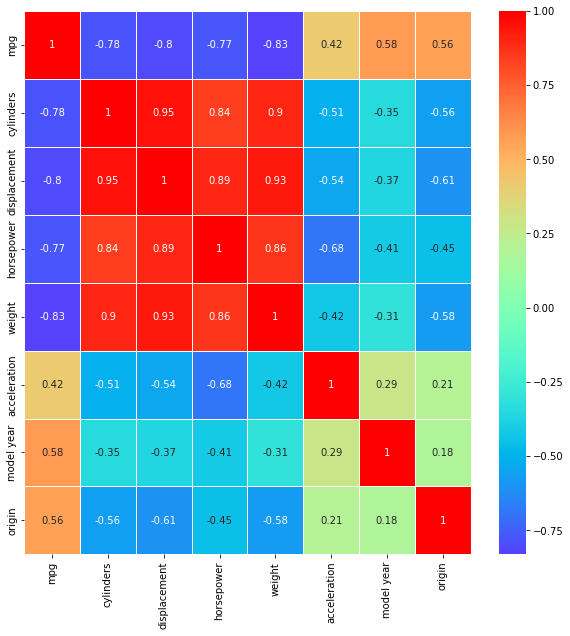

In [15]:
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, linewidths=0.5, center=0, cmap='rainbow')
plt.show()


### Univariate Analysis

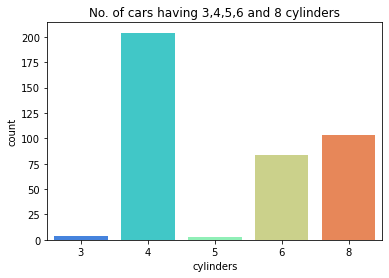

In [16]:
sns.countplot(df['cylinders'],palette='rainbow')
plt.title('No. of cars having 3,4,5,6 and 8 cylinders')
plt.show()

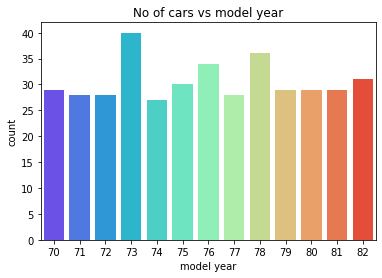

In [17]:
sns.countplot(df['model year'], palette='rainbow')
plt.title("No of cars vs model year")
plt.show()

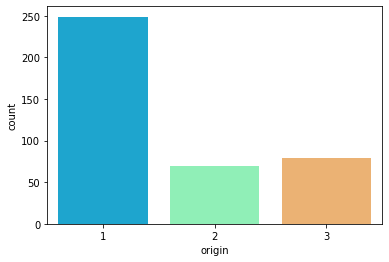

In [18]:
sns.countplot(df.origin, palette='rainbow')
plt.show()

### Multivariate Analysis

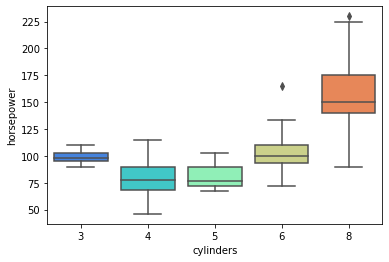

In [19]:
sns.boxplot(y='horsepower', x='cylinders', data=df, palette='rainbow')
plt.show()

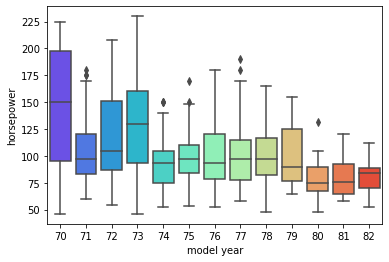

In [20]:
sns.boxplot(y='horsepower', x='model year', data=df, palette='rainbow')
plt.show()

### Data Preparation

In [21]:

X = df.drop(['horsepower'],axis=1)
y= df[['horsepower']]

### Building Model

In [22]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [23]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(278, 7) (120, 7) (278, 1) (120, 1)


In [24]:
lr=LinearRegression()

In [25]:
lr.fit(X_train,y_train)

LinearRegression()

In [26]:
y_pred=lr.predict(X_test)

In [27]:
lr.score(X_test,y_test)

0.894746294149256

In [28]:
metrics.r2_score(y_test,y_pred)

0.894746294149256

In [29]:
y_test

,horsepower
174,97.0
359,80.0
250,140.0
274,103.0
283,90.0
...,...
382,70.0
39,175.0
171,96.0
271,105.0


In [30]:
y_test = y_test.values
y_test

array([[ 97.        ],
       [ 80.        ],
       [140.        ],
       [103.        ],
       [ 90.        ],
       [149.        ],
       [ 49.        ],
       [ 62.        ],
       [120.        ],
       [180.        ],
       [ 84.        ],
       [110.        ],
       [120.        ],
       [110.        ],
       [ 58.        ],
       [ 98.        ],
       [198.        ],
       [ 95.        ],
       [198.        ],
       [ 65.        ],
       [ 97.        ],
       [ 78.        ],
       [ 85.        ],
       [ 88.        ],
       [ 90.        ],
       [ 46.        ],
       [ 75.        ],
       [ 52.        ],
       [140.        ],
       [ 92.        ],
       [110.        ],
       [220.        ],
       [ 87.        ],
       [ 95.        ],
       [ 88.        ],
       [175.        ],
       [ 79.        ],
       [225.        ],
       [ 84.        ],
       [ 75.        ],
       [ 80.        ],
       [ 89.        ],
       [129.        ],
       [ 74

In [31]:
df_comp=pd.DataFrame({'Actual HP': y_test.flatten(),'Predicted HP': y_pred.flatten()})
df_comp.head()

,Actual HP,Predicted HP
0,97.0,107.365113
1,80.0,83.490890
2,140.0,140.532769
3,103.0,96.482892
4,90.0,100.517360


### Polynomial regression

In [32]:

pf = PolynomialFeatures(degree=2,include_bias=False)
X_pf = pf.fit_transform(X)

In [33]:
X.shape,X_pf.shape

((398, 7), (398, 35))

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X_pf,y,test_size=0.3, random_state=1)

lr1= LinearRegression()
lr1.fit(X_train,y_train)

LinearRegression()

In [35]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(278, 35) (120, 35) (278, 1) (120, 1)


In [36]:
lr1.score(X_test,y_test)

0.9037463710056606

In [37]:
y_pre=lr1.predict(X_test)
metrics.r2_score(y_test,y_pre)

0.9037463710056606

In [39]:
y_test = y_test.values
y_test

array([[ 97.        ],
       [ 80.        ],
       [140.        ],
       [103.        ],
       [ 90.        ],
       [149.        ],
       [ 49.        ],
       [ 62.        ],
       [120.        ],
       [180.        ],
       [ 84.        ],
       [110.        ],
       [120.        ],
       [110.        ],
       [ 58.        ],
       [ 98.        ],
       [198.        ],
       [ 95.        ],
       [198.        ],
       [ 65.        ],
       [ 97.        ],
       [ 78.        ],
       [ 85.        ],
       [ 88.        ],
       [ 90.        ],
       [ 46.        ],
       [ 75.        ],
       [ 52.        ],
       [140.        ],
       [ 92.        ],
       [110.        ],
       [220.        ],
       [ 87.        ],
       [ 95.        ],
       [ 88.        ],
       [175.        ],
       [ 79.        ],
       [225.        ],
       [ 84.        ],
       [ 75.        ],
       [ 80.        ],
       [ 89.        ],
       [129.        ],
       [ 74

In [41]:
df_comp=pd.DataFrame({'Actual HP': y_test.flatten(),'Predicted HP': y_pre.flatten()})
df_comp.head()

,Actual HP,Predicted HP
0,97.0,111.358521
1,80.0,75.332395
2,140.0,140.313142
3,103.0,100.648660
4,90.0,94.595841


#### Conclusion:
Accuracy score improves in the case of polynomial regression compared to the linear regression because it fits data much better. 